In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

N = 10
target_points = 2*torch.rand(2, 2) - 1
x_train = 2 * torch.rand(N, 2) - 1

In [2]:
w_ideal = torch.zeros((2, 1))

w_ideal[0, 0] = target_points[1, 1] - target_points[0, 1]
w_ideal[1, 0] = -(target_points[1, 0] - target_points[0, 0])
b_ideal = target_points[1, 0]*target_points[0, 1] - target_points[0, 0]*target_points[1, 1]

In [3]:
x_test = 2 * torch.rand(1000, 2) - 1

y_test = x_test @ w_ideal + b_ideal
y_test[y_test > 0] = 1
y_test[y_test <= 0] = -1

y_train = x_train @ w_ideal + b_ideal # xwT + b
y_train[y_train > 0] = 1
y_train[y_train <= 0] = -1

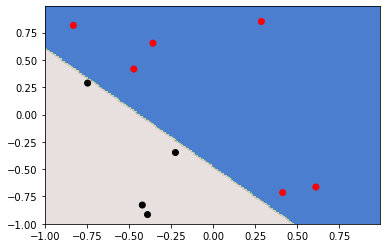

In [4]:
xx, yy = torch.meshgrid([torch.arange(-1.0, 1.0, 0.01), torch.arange(-1.0, 1.0, 0.01)])
full_square = torch.cat((xx.reshape(-1, 1), yy.reshape(-1, 1)), dim=1)

y_test = full_square @ w_ideal + b_ideal
y_test[y_test > 0] = 1
y_test[y_test <= 0] = -1

plt.contourf(xx, yy, y_test.reshape(xx.shape), cmap=plt.cm.terrain, alpha=0.8)
plt.scatter(x_train[:,0],x_train[:,1], c = y_train, cmap=plt.cm.flag)

In [5]:
m, n = x_train.shape
y = y_train.reshape(-1,1) * 1.
X_dash = y_train * x_train
H = np.dot(X_dash , X_dash.T) * 1.

In [6]:
# H = X_dash @ X_dash.T
H = H.astype(np.double)
y = y.numpy().astype(np.double)

In [7]:
P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m, 1)))
G = cvxopt_matrix(-np.eye(m))
h = cvxopt_matrix(np.zeros(m))
A = cvxopt_matrix(y.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))

In [8]:
cvxopt_solvers.options['show_progress'] = True
cvxopt_solvers.options['abstol'] = 1e-10
cvxopt_solvers.options['reltol'] = 1e-10
cvxopt_solvers.options['feastol'] = 1e-10

In [9]:
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x'])

     pcost       dcost       gap    pres   dres
 0: -4.9952e+00 -1.1851e+01  3e+01  4e+00  2e+00
 1: -1.3758e+01 -1.6948e+01  7e+00  1e+00  7e-01
 2: -2.5450e+01 -3.1072e+01  1e+01  1e+00  5e-01
 3: -2.8475e+01 -2.9789e+01  2e+00  6e-02  3e-02
 4: -2.8731e+01 -2.8883e+01  2e-01  6e-03  3e-03
 5: -2.8834e+01 -2.8837e+01  3e-03  9e-05  4e-05
 6: -2.8836e+01 -2.8836e+01  3e-05  9e-07  4e-07
 7: -2.8836e+01 -2.8836e+01  3e-07  9e-09  4e-09
 8: -2.8836e+01 -2.8836e+01  3e-09  9e-11  4e-11
 9: -2.8836e+01 -2.8836e+01  3e-11  9e-13  4e-13
Optimal solution found.


In [10]:
w = ((y * alphas).T @ x_train.numpy()).reshape(-1,1)
S = (alphas > 1e-4).flatten()
b = y[S] - np.dot(x_train[S], w)

In [11]:
print(f'Alphas = {alphas[alphas > 1e-4]}')
print(f'w = {w.flatten()}')
print(f'b = {b[0]}')

Alphas = [10.04082925 18.79487301 28.83570225]
w = [-5.89295733 -4.79003742]
b = [-1.98439414]
